# Performing Data Processing Operations

dataset = *healthcare_datasets.csv*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("healthcare_datasets.csv")
data.head()

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
0,0f5343ac-b858-4726-b8e6-d0e5a7cd73ff,84,Male,95,157,Hypertension
1,ff6cbae7-14d6-486d-a03b-c174dce2b9c0,40,Male,163,285,NaN
2,cc32f20a-c701-4398-85cc-30cfe5e7a62a,72,Male,NAN,168,NaN
3,93c316b3-c2ff-42a9-9895-7ce3e3d6cd8a,39,Male,118,288,Diabetes
4,044838d9-29a8-46da-8d74-18705c8df5d7,28,Female,128,229,Diabetes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      3021 non-null   object
 1   Age             3021 non-null   object
 2   Gender          3021 non-null   object
 3   Blood_Pressure  3021 non-null   object
 4   Cholesterol     3021 non-null   object
 5   Condition       2027 non-null   object
dtypes: object(6)
memory usage: 141.7+ KB


1. Finding Numerical and Categorical fields

2. Finding the unique values and their frequency in Categorical Cols

In [4]:
cols = data.columns

for col in cols:
    print(data[col].value_counts(), end='\n\n')

Patient_ID
NAN                                     4
0587cd2b-3ea8-4bdb-9cf8-f4dca31c80d7    3
f0fcda3b-12bd-4be7-9ee7-4dfd21a42992    2
a93316ec-53ae-4d01-ab8c-250537671436    2
6e265275-78e7-4951-80f7-6c1ab56537a1    2
                                       ..
7853bd85-ffb7-46fa-8d52-ef66c7fa003d    1
8e2b0f5e-41e0-474f-9855-14f478606d4f    1
6b907581-3036-4b15-a9a0-b2e742fa18cd    1
0fd91d6a-7db4-4288-9f12-968bcd76a290    1
f9f7e5f2-3ba7-45d9-b50f-29cbc5ba60e9    1
Name: count, Length: 2997, dtype: int64

Age
55     58
80     53
33     53
49     51
30     51
       ..
21     30
26     30
43     30
50     26
NAN     2
Name: count, Length: 74, dtype: int64

Gender
Female    1564
Male      1453
NAN          4
Name: count, dtype: int64

Blood_Pressure
180    45
118    43
112    42
148    42
179    42
       ..
130    21
165    20
147    18
153    18
NAN     3
Name: count, Length: 102, dtype: int64

Cholesterol
182    27
266    27
141    24
291    23
246    23
       ..
286     8
224    

In [5]:
# Numerical Fields
num_cols = ['Age', 'Blood_Pressure', 'Cholesterol']

# Categorical Fields
cat_cols = ['Gender', 'Condition']

### Replacing the string 'NAN' with NaN (Null Values)

There are string 'NAN' present in Patient_ID, Age, Gender, Blood_Pressure, Cholesterol fields

Finding the rows with 'NAN' in each fields to verify

Replacing the string 'NAN' with NaN (np.nan) for better handling of Null values

In [6]:
data[data['Patient_ID'].astype(str).str.contains('NAN')]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
6,NAN,18,Female,117,119,NaN
45,NAN,28,Female,118,137,Hypertension
108,NAN,90,Male,167,162,Diabetes
133,NAN,82,Male,152,273,Diabetes


In [7]:
data[data['Age'].astype(str).str.contains('NAN')]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
38,48f683dc-b91c-450e-a2ed-505a4e1cd631,NAN,Female,134,207,Hypertension
101,28fa0acf-c6be-47a1-a5f5-9422322849b7,NAN,Male,130,289,Diabetes


In [8]:
data[data['Gender'].astype(str).str.contains('NAN')]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
11,eaa713f7-6811-4b72-a1c7-4ad6dcc3cbe4,90,NAN,170,130,Diabetes
30,9b482580-856b-47d6-8f95-dcae252314b7,56,NAN,92,148,Diabetes
93,2085df94-6e16-403f-b535-f9019b9f927f,80,NAN,157,188,Hypertension
113,0f24164b-f3b1-4fc9-b13a-523eb01b6b48,53,NAN,178,183,Hypertension


In [9]:
data[data['Blood_Pressure'].astype(str).str.contains('NAN')]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
2,cc32f20a-c701-4398-85cc-30cfe5e7a62a,72,Male,NAN,168,NaN
89,0c3e89ec-d70e-4b54-afc4-d9be4a61ca7d,75,Female,NAN,164,NaN
109,6dc00b97-9cd6-410a-8e0f-ff8e88b59607,64,Female,NAN,177,Hypertension


In [10]:
data[data['Cholesterol'].astype(str).str.contains('NAN')]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
27,704372c8-6c88-402e-88ca-607c1c0331da,90,Male,180,NAN,Hypertension
131,a7193bcb-733f-46c6-9686-0cb2e23c2c41,74,Female,119,NAN,Diabetes


In [11]:
data[data['Condition'].astype(str).str.contains('NAN')]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition


In [12]:
data.isna().sum()

Patient_ID          0
Age                 0
Gender              0
Blood_Pressure      0
Cholesterol         0
Condition         994
dtype: int64

In [13]:
# Replacing 'NAN' with np.nan in all fields
data.replace({'NAN': np.nan}, inplace=True)

In [14]:
data.isna().sum()

Patient_ID          4
Age                 2
Gender              4
Blood_Pressure      3
Cholesterol         2
Condition         994
dtype: int64

## 1. Handling Duplicate values

In [15]:
# Finding total number of duplicate rows
data.duplicated().sum()

np.int64(20)

In [16]:
# Finding the duplicate rows to verify
data[data.duplicated()]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
17,ab0cdc9f-c87b-47a0-b646-af0057914fdd,45,Female,101,170,Hypertension
33,56375347-7469-4c55-afc1-a3bb34a45ab1,90,Male,120,133,NaN
34,fc251392-b82f-4740-a112-cae0f04ae2c2,52,Female,114,118,Diabetes
36,76f2b766-6ee2-4623-836b-992d103fdb84,18,Male,90,284,Diabetes
37,ee51fdb7-74a1-48f0-bdaf-d08210f0ea23,89,Male,172,159,Diabetes
55,d9e54707-ef17-4258-9959-34585f26dddc,80,Female,159,179,NaN
76,0587cd2b-3ea8-4bdb-9cf8-f4dca31c80d7,25,Male,98,182,Hypertension
116,1024d17e-62a7-4c5b-92b3-dafcd7b46815,24,Male,180,244,Hypertension
117,5393f449-8718-43f8-bb3a-95a11bea37ef,37,Male,135,194,Diabetes
118,1c5a6492-cf0e-4c8b-ac4f-6c45a2a23e8b,44,Male,166,127,Diabetes


In [17]:
# Dropping all duplicate rows
data.drop_duplicates(inplace=True)

data.duplicated().sum()

np.int64(0)

## 2. Handling Missing Values

In [18]:
# Finding number of missing values in each field
data.isna().sum()

Patient_ID          4
Age                 2
Gender              4
Blood_Pressure      3
Cholesterol         2
Condition         990
dtype: int64

### Finding rows with missing (*NaN*) values in each field

In [19]:
# Finding rows with missing (NaN) values in Patient_ID
data[data.Patient_ID.isna()]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
6,NaN,18,Female,117,119,NaN
45,NaN,28,Female,118,137,Hypertension
108,NaN,90,Male,167,162,Diabetes
133,NaN,82,Male,152,273,Diabetes


In [20]:
# Finding rows with missing (NaN) values in Age
data[data.Age.isna()]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
38,48f683dc-b91c-450e-a2ed-505a4e1cd631,NaN,Female,134,207,Hypertension
101,28fa0acf-c6be-47a1-a5f5-9422322849b7,NaN,Male,130,289,Diabetes


In [21]:
# Finding rows with missing (NaN) values in Gender
data[data.Gender.isna()]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
11,eaa713f7-6811-4b72-a1c7-4ad6dcc3cbe4,90,NaN,170,130,Diabetes
30,9b482580-856b-47d6-8f95-dcae252314b7,56,NaN,92,148,Diabetes
93,2085df94-6e16-403f-b535-f9019b9f927f,80,NaN,157,188,Hypertension
113,0f24164b-f3b1-4fc9-b13a-523eb01b6b48,53,NaN,178,183,Hypertension


In [22]:
# Finding rows with missing (NaN) values in Blood_Pressure
data[data.Blood_Pressure.isna()]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
2,cc32f20a-c701-4398-85cc-30cfe5e7a62a,72,Male,NaN,168,NaN
89,0c3e89ec-d70e-4b54-afc4-d9be4a61ca7d,75,Female,NaN,164,NaN
109,6dc00b97-9cd6-410a-8e0f-ff8e88b59607,64,Female,NaN,177,Hypertension


In [23]:
# Finding rows with missing (NaN) values in Cholesterol
data[data.Cholesterol.isna()]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
27,704372c8-6c88-402e-88ca-607c1c0331da,90,Male,180,NaN,Hypertension
131,a7193bcb-733f-46c6-9686-0cb2e23c2c41,74,Female,119,NaN,Diabetes


In [24]:
# Finding rows with missing (NaN) values in Condition
data[data.Condition.isna()]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
1,ff6cbae7-14d6-486d-a03b-c174dce2b9c0,40,Male,163,285,NaN
2,cc32f20a-c701-4398-85cc-30cfe5e7a62a,72,Male,NaN,168,NaN
5,cb2223ea-a459-4f9c-b88f-96551eefbcdb,60,Male,91,156,NaN
6,NaN,18,Female,117,119,NaN
9,56375347-7469-4c55-afc1-a3bb34a45ab1,90,Male,120,133,NaN
...,...,...,...,...,...,...
2995,c7169137-dddd-4cc2-8253-c5ef99a19660,80,Male,143,216,NaN
2998,d0006a71-ee42-46af-b887-45e7f2fce7ca,53,Female,162,103,NaN
3001,d8ac1267-5a45-43d3-9c29-03445cd41516,71,Male,110,153,NaN
3011,3b337993-9e32-4c4c-bfb8-4c7cc4f44c3d,79,Male,179,298,NaN


### Analyzing Patient_ID missing values to find out how handle NaN values

In [25]:
# Rows with no missing values in Patient_ID
data[data.Patient_ID.notna()]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
0,0f5343ac-b858-4726-b8e6-d0e5a7cd73ff,84,Male,95,157,Hypertension
1,ff6cbae7-14d6-486d-a03b-c174dce2b9c0,40,Male,163,285,NaN
2,cc32f20a-c701-4398-85cc-30cfe5e7a62a,72,Male,NaN,168,NaN
3,93c316b3-c2ff-42a9-9895-7ce3e3d6cd8a,39,Male,118,288,Diabetes
4,044838d9-29a8-46da-8d74-18705c8df5d7,28,Female,128,229,Diabetes
...,...,...,...,...,...,...
3016,6516343d-4f84-42cc-9805-307da385d003,73,Female,96,273,Hypertension
3017,7ef7b2c4-4cbd-44de-887d-aa07548e7e18,30,Female,98,168,Hypertension
3018,e060b7f8-a5ff-44ab-8caf-cd909f08c724,52,Male,94,247,Hypertension
3019,ed118b6f-bf81-4af9-99ee-98eafb3c52e1,21,Male,169,166,Diabetes


In [26]:
# Rows with Missing NaN values in Patient_ID
data[data.Patient_ID.isna()]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
6,NaN,18,Female,117,119,NaN
45,NaN,28,Female,118,137,Hypertension
108,NaN,90,Male,167,162,Diabetes
133,NaN,82,Male,152,273,Diabetes


Finding duplicate rows excluding Patient_ID field

Purpose: Finding duplicate rows of missing patient_id rows which has a patient_id

In [27]:
# Performing inner join on not null rows and null rows on all fields except 'Patient_ID'

pd.merge(
    left=data[data.Patient_ID.notna()],
    right=data[data.Patient_ID.isna()],
    on=['Age', 'Gender', 'Blood_Pressure','Cholesterol','Condition'],
    how='inner'
)

,Patient_ID_x,Age,Gender,Blood_Pressure,Cholesterol,Condition,Patient_ID_y


There are no duplicate rows of missing patient_id rows which has a patient_id

Dropping the rows with null values in patient_id field as patient_id is a primary key in schema

In [28]:
# Dropping rows with null values in patient_id
data.dropna(subset=['Patient_ID'], inplace=True)
data.Patient_ID.isna().sum()

np.int64(0)

### Handling missing values in numerical features

- Finding the statistical values (mean, median, mode) and understanding the distribution of numerical fields

- Finding appropriate value or method to replace null values

In [29]:
# Printing mean, median, mode of numerical features
for col in num_cols:
    subset = data.dropna(subset=col).copy()
    subset[col] = subset[col].astype('int64')
    print(subset[col].describe())
    print(f'Median: {subset[col].median()}')
    print(f'Mode: {subset[col].mode()}', end='\n\n')

count    2995.000000
mean       54.053756
std        20.974890
min        18.000000
25%        36.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64
Median: 54.0
Mode: 0    55
Name: Age, dtype: int64

count    2994.000000
mean      131.013026
std        29.438494
min        80.000000
25%       106.000000
50%       131.000000
75%       157.000000
max       180.000000
Name: Blood_Pressure, dtype: float64
Median: 131.0
Mode: 0    180
Name: Blood_Pressure, dtype: int64

count    2995.000000
mean      197.559933
std        57.865189
min       100.000000
25%       149.000000
50%       194.000000
75%       248.000000
max       300.000000
Name: Cholesterol, dtype: float64
Median: 194.0
Mode: 0    266
Name: Cholesterol, dtype: int64



Median values of all numerical features seems more appropriate to replace null values

In [30]:
# Replacing null values in numerical features with median value of that field
for col in num_cols:
    subset = data.dropna(subset=col).copy()
    subset[col] = subset[col].astype('int64')
    median_value = subset[col].median()
    data[col] = data[col].fillna(median_value)

In [31]:
data.isna().sum()

Patient_ID          0
Age                 0
Gender              4
Blood_Pressure      0
Cholesterol         0
Condition         989
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, 0 to 3020
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      2997 non-null   object
 1   Age             2997 non-null   object
 2   Gender          2993 non-null   object
 3   Blood_Pressure  2997 non-null   object
 4   Cholesterol     2997 non-null   object
 5   Condition       2008 non-null   object
dtypes: object(6)
memory usage: 163.9+ KB


In [33]:
# Changing the data type of numerical fields to int32
for col in num_cols:
    data[col] = data[col].astype('int32')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, 0 to 3020
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      2997 non-null   object
 1   Age             2997 non-null   int32 
 2   Gender          2993 non-null   object
 3   Blood_Pressure  2997 non-null   int32 
 4   Cholesterol     2997 non-null   int32 
 5   Condition       2008 non-null   object
dtypes: int32(3), object(3)
memory usage: 128.8+ KB


### Handling null values in Categorical fields

- Finding the unique values and their frequency

- Finding frequency of null values

In [35]:
# Handling null values in Gender field

# Unique values and their frequency
data['Gender'].value_counts(dropna=False)

Gender
Female    1554
Male      1439
NaN          4
Name: count, dtype: int64

In [36]:
data[data['Gender'].isna()]

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
11,eaa713f7-6811-4b72-a1c7-4ad6dcc3cbe4,90,NaN,170,130,Diabetes
30,9b482580-856b-47d6-8f95-dcae252314b7,56,NaN,92,148,Diabetes
93,2085df94-6e16-403f-b535-f9019b9f927f,80,NaN,157,188,Hypertension
113,0f24164b-f3b1-4fc9-b13a-523eb01b6b48,53,NaN,178,183,Hypertension


In [37]:
# Most frequent value is female
# Replacing na values with 'Female'

data['Gender'] = data['Gender'].fillna('Female')
data['Gender'].value_counts(dropna=False)

Gender
Female    1558
Male      1439
Name: count, dtype: int64

In [38]:
# Handling null values in Condition field

# Unique values and their frequency
data['Condition'].value_counts(dropna=False)

Condition
Diabetes        1024
NaN              989
Hypertension     984
Name: count, dtype: int64

- The null values in Condition points towards the patient having no condition, as the frequency is high

- Replacing null values with 'None' in condition field

In [39]:
# Filling null values with 'None'
data['Condition'] = data['Condition'].fillna('None')

In [40]:
data['Condition'].value_counts(dropna=False)

Condition
Diabetes        1024
None             989
Hypertension     984
Name: count, dtype: int64

## 3. Handling Outliers

1. Using IQR (Inter Quartile Range) to find outlier datapoints

2. Using Z-Score to find outlier datapoints

In [41]:
# Finding outliers in Age using IQR
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Age'] < (Q1 - 1.5 * IQR)) | (data['Age'] > (Q3 + 1.5 * IQR))]
outliers

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition


In [42]:
# Finding outliers in Blood_Pressure using IQR
Q1 = data['Blood_Pressure'].quantile(0.25)
Q3 = data['Blood_Pressure'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Blood_Pressure'] < (Q1 - 1.5 * IQR)) | (data['Blood_Pressure'] > (Q3 + 1.5 * IQR))]
outliers

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition


In [43]:
# Finding outliers in Cholesterol using IQR
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Cholesterol'] < (Q1 - 1.5 * IQR)) | (data['Cholesterol'] > (Q3 + 1.5 * IQR))]
outliers

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition


In [44]:
# Finding z-scores of numerical fields

from scipy.stats import zscore

z_scores = zscore(data[num_cols])
abs_z_scores = abs(z_scores)

# Datapoint is outlier if z-score is more than 3
outliers_z = abs_z_scores > 3

# Total no.of outliers in numerical columns
print(outliers_z.sum())

Age               0
Blood_Pressure    0
Cholesterol       0
dtype: int64


In [45]:
# Z-Scores of numerical columns
abs_z_scores

,Age,Blood_Pressure,Cholesterol
0,1.428436,1.224148,0.701248
1,0.670362,1.087296,1.511896
2,0.856036,0.000442,0.511056
3,0.718061,0.442336,1.563766
4,1.242761,0.102418,0.543646
...,...,...,...
3016,0.903736,1.190156,1.304414
3017,1.147361,1.122172,0.511056
3018,0.097962,1.258140,0.854869
3019,1.576660,1.291247,0.545636


- There are no outliers in numerical fields, calculated using Z-Score and IQR

### Visualising numerical features to find outliers

- box plots
- scatter plots

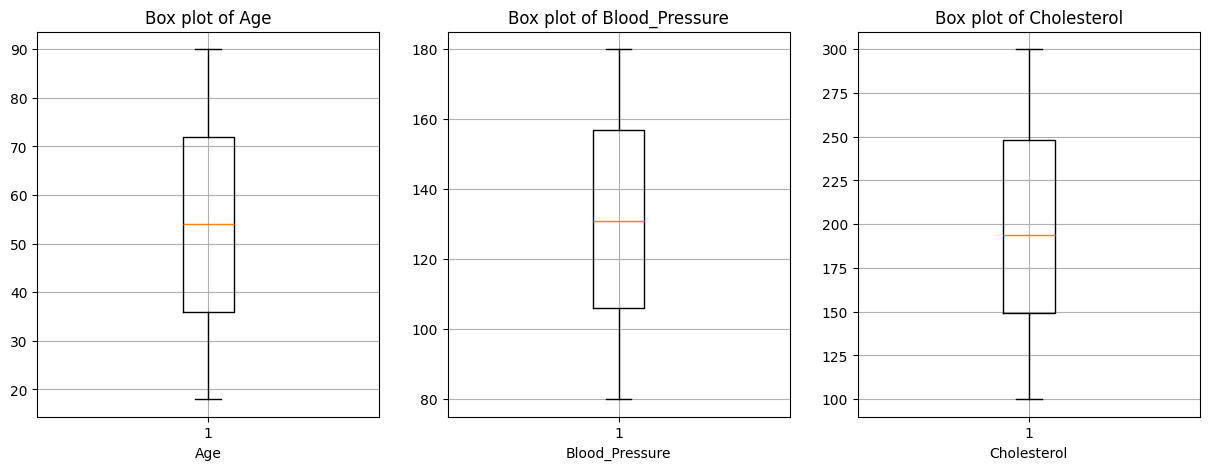

In [46]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    plt.boxplot(x=data[col])
    plt.xlabel(col)
    plt.grid(True)
    plt.title(f"Box plot of {col}")
plt.show()

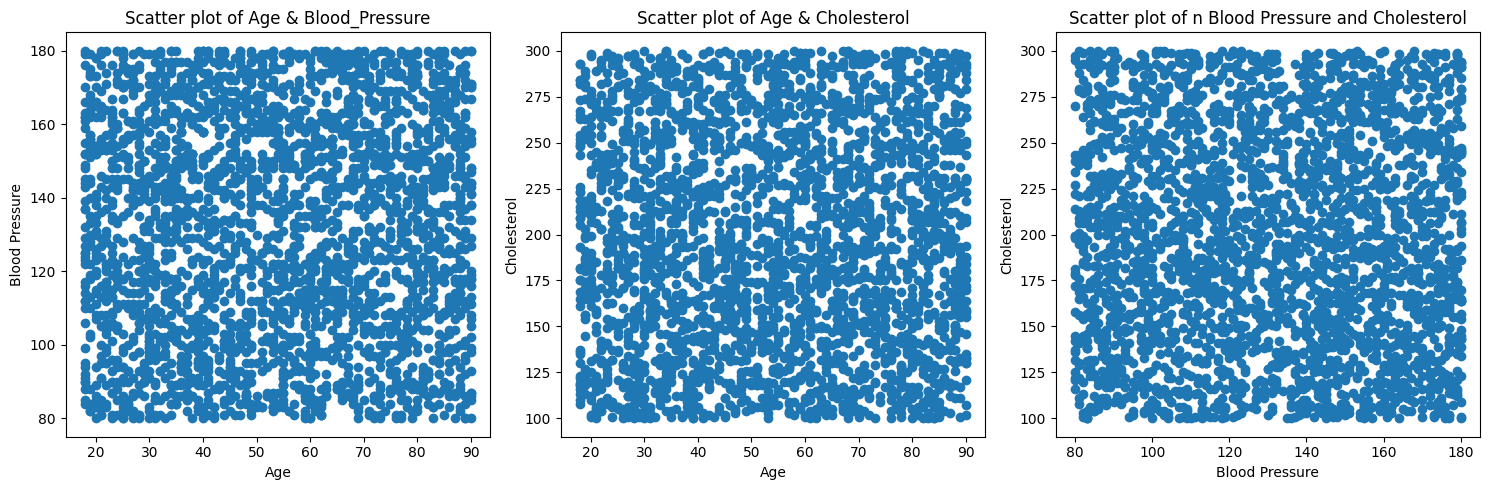

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(x=data['Age'], y=data['Blood_Pressure'])
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.title(f'Scatter plot of Age & Blood_Pressure')

plt.subplot(1,3,2)
plt.scatter(x=data['Age'], y=data['Cholesterol'])
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title(f'Scatter plot of Age & Cholesterol')

plt.subplot(1,3,3)
plt.scatter(x=data['Blood_Pressure'], y=data['Cholesterol'])
plt.xlabel("Blood Pressure")
plt.ylabel("Cholesterol")
plt.title('Scatter plot of n Blood Pressure and Cholesterol')

plt.tight_layout()
plt.show()

There are no outliers present in box plots and there is no correlation in numerical features from scatter plots

### Visualising categorical fields

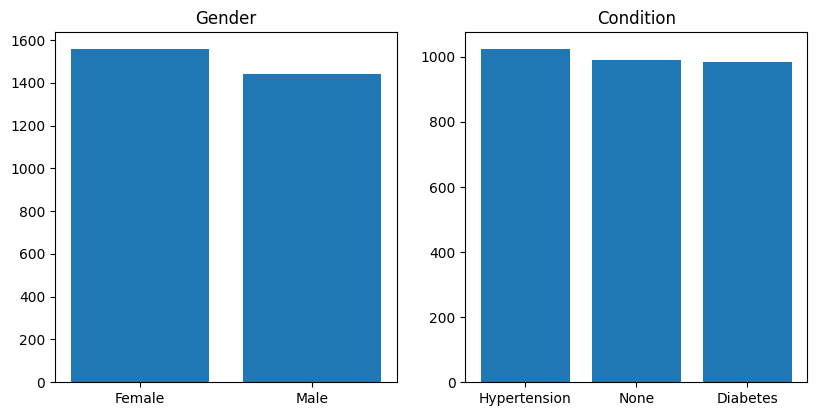

In [48]:
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.bar(x=data['Gender'].unique(), height=data['Gender'].value_counts())
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title('Gender')

plt.subplot(2,3,2)
plt.bar(x=data['Condition'].unique(), height=data['Condition'].value_counts())
plt.title('Condition')
plt.show()

## 4. Performing Data Transformation:

- Scaling numerical features

- Encoding categorical features

### Scaling numerical features:

- Using Standard scaler to scale numerical features as there are no outliers present

- Using the z-scores of numerical features to scale data

In [49]:
# Using scikit-learn for standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

In [50]:
# Numerical features are scaled using Z-Scores
data

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
0,0f5343ac-b858-4726-b8e6-d0e5a7cd73ff,1.428436,Male,-1.224148,-0.701248,Hypertension
1,ff6cbae7-14d6-486d-a03b-c174dce2b9c0,-0.670362,Male,1.087296,1.511896,None
2,cc32f20a-c701-4398-85cc-30cfe5e7a62a,0.856036,Male,-0.000442,-0.511056,None
3,93c316b3-c2ff-42a9-9895-7ce3e3d6cd8a,-0.718061,Male,-0.442336,1.563766,Diabetes
4,044838d9-29a8-46da-8d74-18705c8df5d7,-1.242761,Female,-0.102418,0.543646,Diabetes
...,...,...,...,...,...,...
3016,6516343d-4f84-42cc-9805-307da385d003,0.903736,Female,-1.190156,1.304414,Hypertension
3017,7ef7b2c4-4cbd-44de-887d-aa07548e7e18,-1.147361,Female,-1.122172,-0.511056,Hypertension
3018,e060b7f8-a5ff-44ab-8caf-cd909f08c724,-0.097962,Male,-1.258140,0.854869,Hypertension
3019,ed118b6f-bf81-4af9-99ee-98eafb3c52e1,-1.576660,Male,1.291247,-0.545636,Diabetes


In [51]:
data.describe()

,Age,Blood_Pressure,Cholesterol
count,2.997000e+03,2.997000e+03,2.997000e+03
mean,-1.090589e-16,-3.236206e-16,2.287867e-16
std,1.000167e+00,1.000167e+00,1.000167e+00
min,-1.719760e+00,-1.734025e+00,-1.686788e+00
25%,-8.611613e-01,-8.502378e-01,-8.395690e-01
50%,-2.562459e-03,-4.423360e-04,-6.151082e-02
75%,8.560364e-01,8.833450e-01,8.721590e-01
max,1.714635e+00,1.665157e+00,1.771248e+00


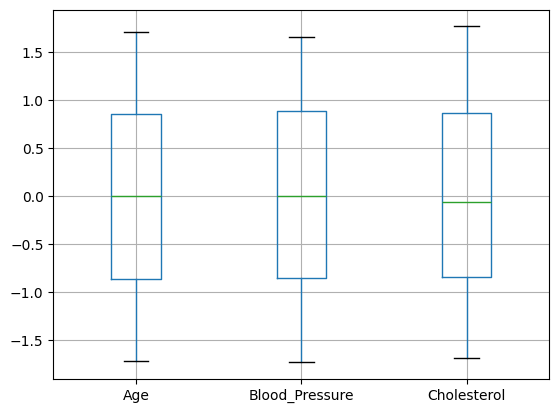

In [52]:
# Distribution of numerical features

data[num_cols].boxplot()
plt.show()

### Encoding categorical features

1. Gender:
	- Using One Hot Encoding to create 'is_Male' feature and dropping 'is_Female' feature

	- is_Male is used to indicate the gender using boolean value, where *False* is *Female* and *True* is *Male*

2. Condition:
	- Using One Hot Encoding to create 'Condition_Diabetes' and 'Condition_Hypertension' features, while dropping 'Condition_None'

	- These 2 features indicate the type of condition where:
		- Either one of Condition features is True, indicating the condition by which one of feature has True value
		- Both features has False values, indicating the Condition as None.

In [53]:
data = pd.get_dummies(data=data, prefix='is_', columns=['Gender'], drop_first=True)

In [54]:
data = pd.get_dummies(data=data, columns=['Condition'])
data = data.drop(columns='Condition_None')

In [55]:
data.head()

,Patient_ID,Age,Blood_Pressure,Cholesterol,is__Male,Condition_Diabetes,Condition_Hypertension
0,0f5343ac-b858-4726-b8e6-d0e5a7cd73ff,1.428436,-1.224148,-0.701248,True,False,True
1,ff6cbae7-14d6-486d-a03b-c174dce2b9c0,-0.670362,1.087296,1.511896,True,False,False
2,cc32f20a-c701-4398-85cc-30cfe5e7a62a,0.856036,-0.000442,-0.511056,True,False,False
3,93c316b3-c2ff-42a9-9895-7ce3e3d6cd8a,-0.718061,-0.442336,1.563766,True,True,False
4,044838d9-29a8-46da-8d74-18705c8df5d7,-1.242761,-0.102418,0.543646,False,True,False
